In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Load the dataset into python environment

In [2]:
df=pd.read_csv(r'E:\DATA SCIENCE\CODES and DOCS\DOCS\titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Make ‘PassengerId’ as the index column

In [119]:
df=pd.read_csv(r'E:\DATA SCIENCE\CODES and DOCS\DOCS\titanic_dataset.csv',index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  Check the basic details of the dataset

In [67]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [69]:
df.shape

(891, 11)

# Fill in all the missing values present in all the columns in the dataset

In [70]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [71]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [72]:
freq=df[['Age','Cabin','Embarked']]
freq

,Age,Cabin,Embarked
PassengerId,,,
1,22.0,NaN,S
2,38.0,C85,C
3,26.0,NaN,S
4,35.0,C123,S
5,35.0,NaN,S
...,...,...,...
887,27.0,NaN,S
888,19.0,B42,S
889,NaN,NaN,S


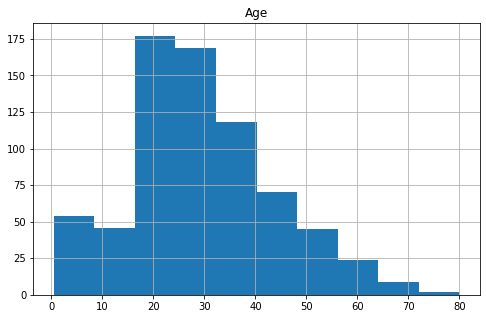

In [73]:
freq.hist(figsize=(8,5))
plt.show()

In [74]:
#Filling the missing values in age with median
df['Age']=df['Age'].fillna(df['Age'].median())

In [75]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [76]:
df['Cabin'].nunique()


147

In [77]:
df['Embarked'].nunique()

3

In [78]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [79]:
df['Embarked'].mode()

0    S
dtype: object

In [80]:
#Filling the missing values of Embarked with respective mode
df['Embarked']=df['Embarked'].fillna('S')

In [81]:
#dropping the Cabin column 
df.drop('Cabin',axis=1,inplace=True)

In [82]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Check and handle outliers in at least 3 columns in the dataset

In [83]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Box plot for Fare')

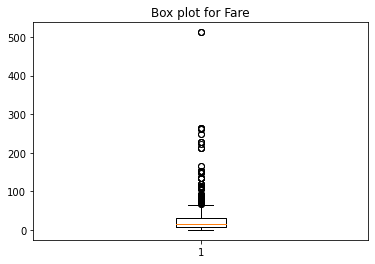

In [84]:
#Checking the Fare column
plt.boxplot(df['Fare'])
plt.title('Box plot for Fare')

In [85]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR


In [86]:
out=[]
for i in df['Fare']:
    if((i<low_lim) or (i>up_lim)):
        
        out.append(i)

In [87]:
#Outliers
out

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [90]:
lis1=df['Fare']>up_lim
ind_fare=df.loc[lis1].index

In [91]:
lis2=df['Fare']<low_lim
df.loc[lis2].index

Int64Index([], dtype='int64', name='PassengerId')

In [92]:
#dropping the indices having Outliers
df.drop(ind_fare,inplace=True)

Text(0.5, 1.0, 'Box plot for Fare')

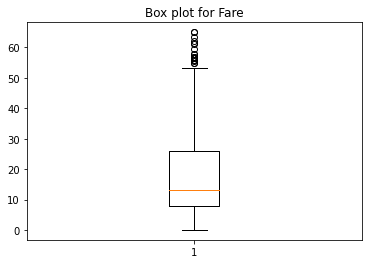

In [93]:
#New boxplot
plt.boxplot(df['Fare'])
plt.title('Box plot for Fare')

Text(0.5, 1.0, 'Box plot for Fare')

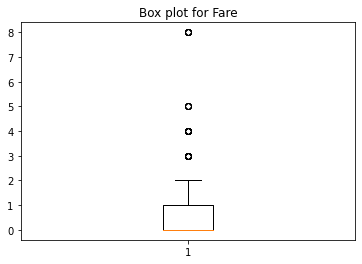

In [120]:
#Checking the SibSp column
plt.boxplot(df['SibSp'])
plt.title('Box plot for SibSp')

In [121]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
#Outliers
out

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [122]:
out=[]
for i in df['SibSp']:
    if((i<low_lim) or (i>up_lim)):
        
        out.append(i)

In [123]:
lis1=df['SibSp']>up_lim
ind_fare=df.loc[lis1].index
ind_fare

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [124]:
lis2=df['SibSp']<low_lim
df.loc[lis2].index

Int64Index([], dtype='int64', name='PassengerId')

In [125]:
#dropping the indices having Outliers
df.drop(ind_fare,inplace=True)

Text(0.5, 1.0, 'Box plot for SibSp')

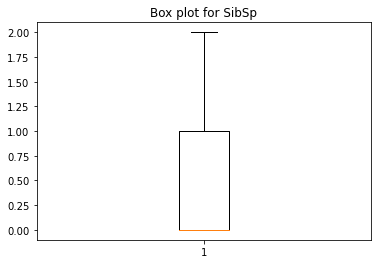

In [127]:
#New boxplot
plt.boxplot(df['SibSp'])
plt.title('Box plot for SibSp')

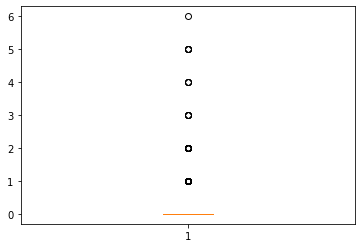

In [129]:
#plot Parch
plt.boxplot(df["Parch"])
plt.show()


In [130]:
Q1_parch = np.percentile(df['Parch'],25,interpolation='midpoint')
Q2_parch = np.percentile(df['Parch'],50,interpolation='midpoint')
Q3_parch = np.percentile(df['Parch'],75,interpolation='midpoint')
print('Q1: ',Q1_parch,'\nQ2: ',Q2_parch,'\nQ3: ',Q3_parch)

Q1:  0.0 
Q2:  0.0 
Q3:  0.0


In [ ]:
#There is no ouliers for parch

# Do min max scaling on the feature set (Take ‘Survived’ as target)

<AxesSubplot:>

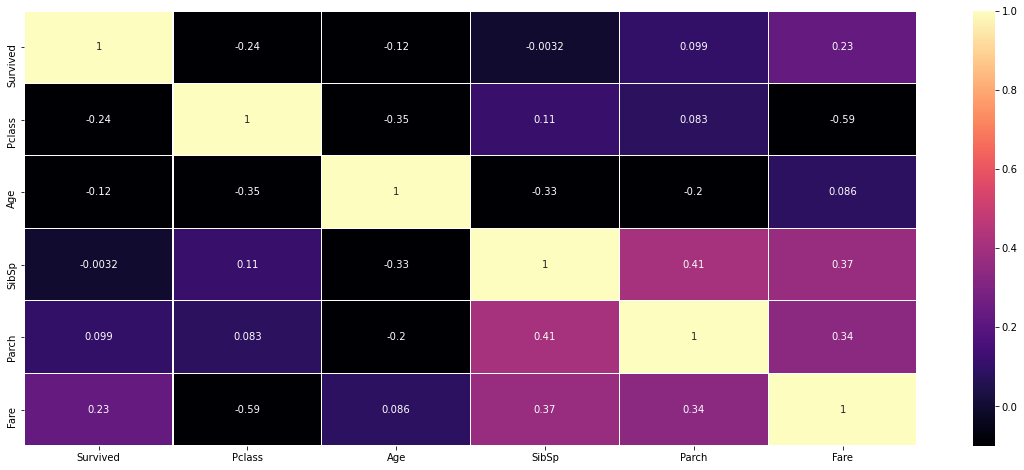

In [96]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.1,vmax=1, annot=True, linewidths=0.2,cmap="magma")

In [98]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [100]:
x = df.drop(["Survived","Sex","Name","Ticket","Embarked"], axis = 1)
y = df["Survived"]

In [101]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [102]:
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4
count,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.740000,0.355978,0.087484,0.056774,0.274186
std,0.367195,0.160620,0.179968,0.130986,0.208894
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.121474
50%,1.000000,0.346569,0.000000,0.000000,0.200000
75%,1.000000,0.421965,0.200000,0.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predicitons=model.predict(x_test)
print('MSE:',mean_squared_error(y_test,predicitons))
print('R2:',r2_score(y_test,predicitons))

MSE: 0.21776760245499963
R2: 0.0821286580734446


In [105]:
df.shape

(775, 10)